In [1]:
from module1_mesh import*
from module2_forward import*
from module3_inverse import*
from module4_auxiliar import*
import matplotlib.pyplot as plt

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed',)).History will not be written to the database.


In [2]:
mesh_inverse, mesh_direct=MyMesh(r=1, n=12, n_vertex=121) #Genereting mesh

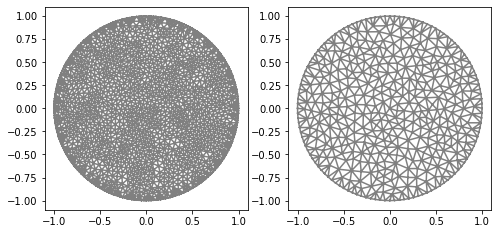

In [3]:
"Plot"
plt.figure(figsize=(8, 8))
plt.subplot(1,2,1)
plot(mesh_direct);
plt.subplot(1,2,2)
plot(mesh_inverse);

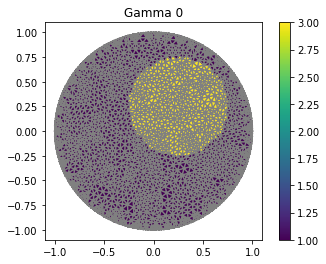

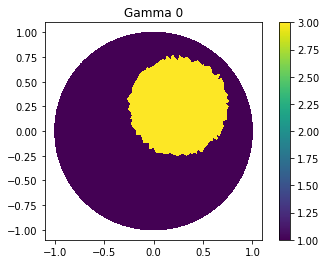

In [4]:
ValuesCells0=GammaCircle(mesh_direct,3.0,1.0,0.50, 0.25, 0.25);
gamma0=CellFunction(mesh_direct, values=ValuesCells0);          


"Plot"
V_DG=FiniteElement('DG',mesh_direct.ufl_cell(),0)
Q=FunctionSpace(mesh_direct,V_DG)
gamma0_func=interpolate(gamma0, Q)
p=plot(gamma0_func, title="Gamma 0")
plot(mesh_direct)
plt.colorbar(p)

"Plot"
V_DG=FiniteElement('DG',mesh_direct.ufl_cell(),0)
plot_figure(mesh_direct, V_DG, gamma0, name="Gamma 0", map="viridis");

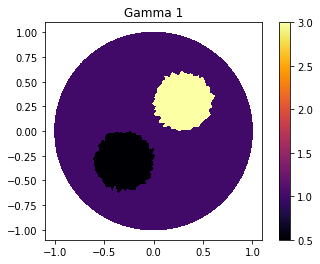

In [5]:
ValuesCells0=GammaCircle(mesh_direct,2.5,0.5,0.30, 0.30, 0.30);
ValuesCells1=GammaCircle(mesh_direct,0.0,0.5,0.30, -0.30, -0.30);
gamma1=CellFunction(mesh_direct, values=ValuesCells0+ValuesCells1);          

plot_figure(mesh_direct, V_DG, gamma1, name="Gamma 1", map="inferno");

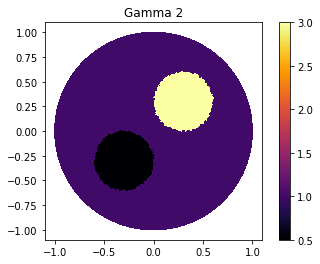

In [6]:
mesh_direct2=refine(refine(mesh_direct))

ValuesCells0=GammaCircle(mesh_direct2,2.5,0.5,0.30, 0.30, 0.30);
ValuesCells1=GammaCircle(mesh_direct2,0.0,0.5,0.30, -0.30, -0.30);
gamma2=CellFunction(mesh_direct2, values=ValuesCells0+ValuesCells1);          

V_DG=FiniteElement('DG',mesh_direct2.ufl_cell(),0)
plot_figure(mesh_direct2, V_DG, gamma2, name="Gamma 2", map="inferno");


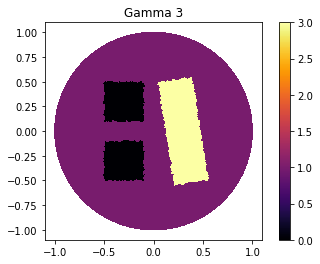

In [7]:
def GammaQuad(mesh, in_v, out_v, radius,centerx, centery, angle=0, a=1, b=1):
    ValuesGamma=np.zeros(mesh.num_cells())
    centerx_new = centerx*cos(angle)-centery*sin(angle)
    centery_new = centery*cos(angle)+centerx*sin(angle)
    centerx, centery=centerx_new, centery_new
    
    for i in range(0, mesh.num_cells()):
        cell = Cell(mesh, i)
        
        vertices=np.array(cell.get_vertex_coordinates())
        x=(vertices[0]+vertices[2]+vertices[4])/3           
        y=(vertices[1]+vertices[3]+vertices[5])/3
        
        "rotation"
        x_new=x*cos(angle)-y*sin(angle)
        y_new=y*cos(angle)+x*sin(angle)
        x,y=x_new,y_new
        

        
        if (1/a*abs(x-centerx)>=radius) or 1/b*abs(y-centery)>=radius:
            ValuesGamma[i]=out_v
        else:
            ValuesGamma[i]=in_v
    
    return ValuesGamma


ValuesCells1=GammaQuad(mesh_direct2, 3.0, 1.0, 0.35, 0.3, 0.0, pi/2*0.9, 1.5, 0.5);
ValuesCells2=GammaQuad(mesh_direct2,-1.0, 0.0, 0.2, -0.30, -0.30);
ValuesCells3=GammaQuad(mesh_direct2,-1.0, 0.0, 0.2, -0.30, 0.30);
gamma3=CellFunction(mesh_direct2, values=ValuesCells1+ValuesCells2+ValuesCells3);          

V_DG=FiniteElement('DG',mesh_direct2.ufl_cell(),0)
plot_figure(mesh_direct2, V_DG, gamma3, name="Gamma 3", map="inferno");





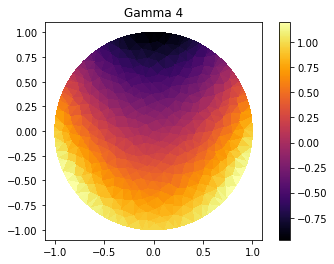

In [8]:
func=Expression("pow(x[0],2)-x[1]", degree=2)

mesh=mesh_inverse
ValuesCells4=np.zeros(mesh.num_cells())
for cell in cells(mesh):
    ValuesCells4[cell.index()]=func(cell.midpoint())
    
gamma4=CellFunction(mesh, values=ValuesCells4);          

V_DG=FiniteElement('DG',mesh.ufl_cell(),0)
plot_figure(mesh, V_DG, gamma4, name="Gamma 4", map="inferno");


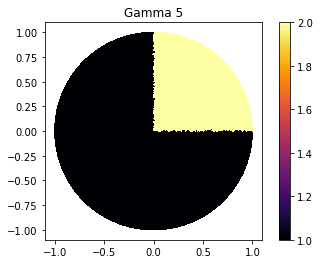

In [9]:
func2=Expression("x[1]>= 0 & x[0]>=0 ? 2 : 1 ", degree=2)

mesh=mesh_direct2
ValuesCells5=np.zeros(mesh.num_cells())
for cell in cells(mesh):
    ValuesCells5[cell.index()]=func2(cell.midpoint())    
    
gamma5=CellFunction(mesh, values=ValuesCells5);          

V_DG=FiniteElement('DG',mesh.ufl_cell(),0)
plot_figure(mesh, V_DG, gamma5, name="Gamma 5", map="inferno");